In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, Sequential
from DataGenerator import DataGenerator

In [2]:
df = pd.read_csv("./logs/CNN_no_edge_frames_2020_01_20.log")

In [27]:
# Loading data
X_test = np.load('./datasets/CNN/X_test_no_edge_frames.npy')
y_test = np.load('./datasets/CNN/y_test_no_edge_frames.npy')
y_train = np.load('./datasets/CNN/y_train_no_edge_frames.npy')

test_gen = DataGenerator(X_test, y_test, 128)

In [4]:
# load model
model = load_model('./models/CNN_no_edge_frames_2020_01_20.h5')

In [5]:
p = model.predict_generator(test_gen)

In [6]:
np.argmax(y_test, axis=1)

array([7, 7, 7, ..., 8, 8, 8])

In [7]:
np.argmax(p, axis=1)

array([ 7,  7, 28, ...,  4,  7, 19])

In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [9]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(p, axis=1))

In [63]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          figsize=(12,10)):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:0.4f}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid()
    plt.show()

In [30]:
df_annot = pd.read_csv('../Annotations/processedAnnotations_no_corrupted_videos.csv')

In [34]:
count = df_annot.groupby(['CM']).count()['palavra']
threshold = 20

In [35]:
def replaceClass(cg):
    quantity = count[cg]
    if (quantity <= threshold):
        return 'others'
    else:
        return cg


df_annot['classe'] = df_annot['CM'].map(replaceClass)
df_annot['classe'] = df_annot['classe'].astype('category')

In [39]:
df_annot['classe'].astype('category').cat.categories.values

array(['cg01', 'cg02', 'cg05', 'cg07', 'cg08a', 'cg11', 'cg12', 'cg14',
       'cg15', 'cg16', 'cg18a', 'cg19', 'cg20', 'cg21', 'cg22b', 'cg24',
       'cg25', 'cg27', 'cg28', 'cg31', 'cg32', 'cg33', 'cg34', 'cg35a',
       'cg37a', 'cg39', 'cg40', 'cg42', 'cg44', 'cg45', 'cg46a', 'cg47',
       'cg49', 'cg50', 'cg51a', 'cg51b', 'cg52', 'cg53a', 'cg53b', 'cg54',
       'cg55', 'cg57', 'cg58', 'cg61', 'cg62', 'cg63', 'cg64', 'others'],
      dtype=object)

In [48]:
import matplotlib.pyplot as plt

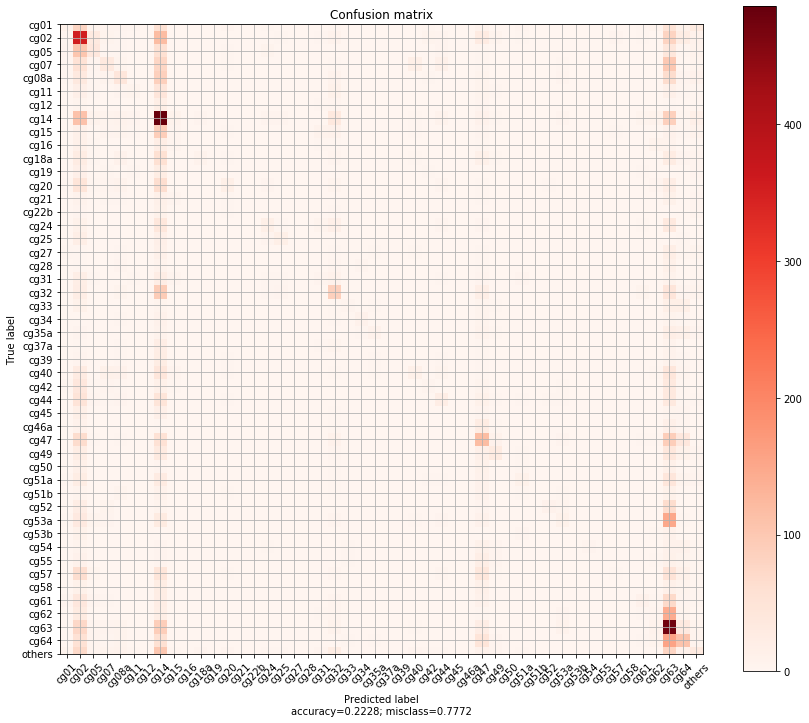

In [64]:
plot_confusion_matrix(cm, target_names=df_annot['classe'].astype('category').cat.categories.values, cmap=plt.get_cmap('Reds'))

In [89]:
df_annot['CM'].value_counts().head(7).index

Index(['cg14', 'cg63', 'cg02', 'cg64', 'cg47', 'cg07', 'cg01'], dtype='object')

In [26]:
pd.Series(np.argmax(y_test, axis=1)).value_counts()

7     833
45    745
1     701
46    466
31    412
47    398
3     328
20    303
0     301
4     287
2     279
37    270
41    246
44    222
28    198
12    197
43    183
26    182
8     173
32    173
10    168
15    151
34    143
27    127
36    127
5     119
19     96
23     80
42     80
21     79
9      72
40     70
39     64
25     64
16     64
17     64
30     63
35     62
11     56
13     56
29     55
33     54
18     48
24     48
22     48
6      47
14     32
38     32
dtype: int64

In [28]:
pd.Series(np.argmax(y_train, axis=1)).value_counts()

7     3306
45    2990
1     2787
46    1872
31    1671
47    1577
3     1325
0     1218
20    1205
4     1133
2     1102
37    1072
41     990
44     886
12     793
28     780
26     745
43     709
32     700
8      681
10     664
15     611
34     562
27     508
36     491
5      458
19     386
23     320
42     316
40     303
21     299
9      270
17     263
35     263
30     256
25     253
16     252
39     235
11     231
29     224
13     208
33     207
18     200
24     198
6      196
22     175
38     144
14     141
dtype: int64

In [66]:
from tensorflow.keras.preprocessing.image import load_img

In [80]:
df_annot.head()

,palavra,video_url,filename,classe_gramatical,assunto,configuracao_mao,CM,classe
0,A,http://www.acessibilidadebrasil.org.br/libras_...,A.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg01,cg01
1,ABACATE,http://www.acessibilidadebrasil.org.br/libras_...,ABACATE.mp4,SUBSTANTIVO,FRUTA,http://www.acessibilidadebrasil.org.br/libras_...,cg53a,cg53a
2,ABACAXI,http://www.acessibilidadebrasil.org.br/libras_...,ABACAXI.mp4,SUBSTANTIVO,FRUTA,http://www.acessibilidadebrasil.org.br/libras_...,cg47,cg47
3,ABAFAR,http://www.acessibilidadebrasil.org.br/libras_...,ABAFAR.mp4,VERBO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg07,cg07
4,ABAIXO,http://www.acessibilidadebrasil.org.br/libras_...,ABAIXO.mp4,ADV.,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg62,cg62


In [77]:
import re
from glob import glob
def getFrameNumber(path):
    return int(re.search(r".*\/frame(\d+)\.jpg", path).group(1))


def getFiles(path):
    files = list(glob(path + "/*.jpg"))
    files.sort(key=getFrameNumber)
    return files

In [81]:
df_annot.query('CM == "cg14"')

,palavra,video_url,filename,classe_gramatical,assunto,configuracao_mao,CM,classe
13,ABATIMENTO,http://www.acessibilidadebrasil.org.br/libras_...,ABATIMENTO.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
46,ABRIR1,http://www.acessibilidadebrasil.org.br/libras_...,ABRIR1.mp4,VERBO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
73,ACAUTELAR,http://www.acessibilidadebrasil.org.br/libras_...,ACAUTELAR.mp4,VERBO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
82,ACENTO1,http://www.acessibilidadebrasil.org.br/libras_...,ACENTO1.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
83,ACENTO2,http://www.acessibilidadebrasil.org.br/libras_...,ACENTO2.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
...,...,...,...,...,...,...,...,...
5662,VOCE,http://www.acessibilidadebrasil.org.br/libras_...,VOCE.mp4,PRONOME,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
5667,VOLTAR2,http://www.acessibilidadebrasil.org.br/libras_...,VOLTAR2.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
5672,VONTADE,http://www.acessibilidadebrasil.org.br/libras_...,VONTADE.mp4,SUBSTANTIVO,SENTIMENTOS,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14
5695,Z,http://www.acessibilidadebrasil.org.br/libras_...,Z.mp4,SUBSTANTIVO,NENHUM,http://www.acessibilidadebrasil.org.br/libras_...,cg14,cg14


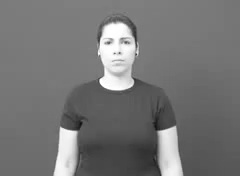

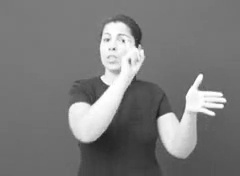

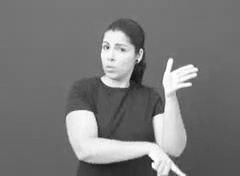

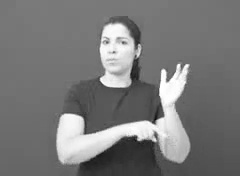

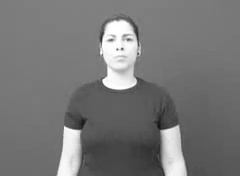

In [83]:
images = getFiles('../KeyFramesExtraction/Result/5/A/ABATIMENTO/')
for image_path in images:
    display(load_img(image_path))

In [96]:
y_train = np.load('./datasets/CNN/y_train_no_edge_frames_subset.npy')
y_test = np.load('./datasets/CNN/y_test_no_edge_frames_subset.npy')

In [108]:
1 / (pd.Series(y_train).value_counts() / pd.Series(y_train).value_counts().sum()).sort_index().values

array([12.39411284,  5.43687231, 11.48333333,  4.59194184,  9.109375  ,
        5.06617647,  8.10588235])

In [94]:
pd.Series(y_test).value_counts()

3    833
5    749
1    701
6    468
4    409
2    334
0    302
dtype: int64